Assignment 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the dataset from google drive.

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/ML Assignment 2 /Fish.csv"
df=pd.read_csv(path, on_bad_lines='skip')
df.head()

Dataset Description: 

*This dataset contains model-specific fish species, weight, length, height and width



 

Importing important libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The code below is to plot the width and weight of fish.

In [ ]:
y =np.array(df.Weight.values.reshape(-1,1)) 
x =np.array(df.Width.values.reshape(-1,1)) 

plt.scatter(x,y)
plt.title('Dataset')
plt.ylabel("weight of fish in Gram")
plt.xlabel("diagonal width in cm")

PART 1:

The code below splits the dataset into 75% training, 10% testing, 15% validation and performs Linear Regression on dataset from sklearn library.

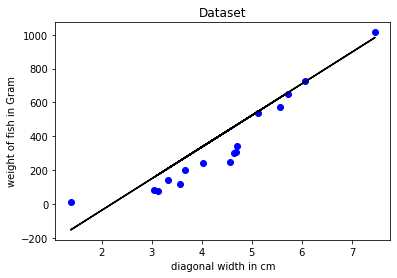

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio) #sets test size =25% 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred = linear_reg.predict(x_test)

plt.scatter(x_test, y_test, color ='b')

plt.plot(x_test, y_pred, color ='k')
plt.title('Dataset')
plt.ylabel("weight of fish in Gram")
plt.xlabel("diagonal width in cm")
plt.show()



In the code below, I'm calculating the mean absolute error for the dataset without scaling and after applying linear regression on it.

In [ ]:
from sklearn.metrics import mean_absolute_error
error1= mean_absolute_error(y_test, y_pred)
print('mean absolute error = '+str(error1))

mean absolute error = 90.89366066646474


PART 3:

Applying polynomial regression with feature of degree=4 without scaling the dataset.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_transform = PolynomialFeatures(degree=4, include_bias=False)
x_poly_train = poly_transform.fit_transform(x_train)
x_poly_test = poly_transform.transform(x_test)

regressor = LinearRegression()
regressor.fit(x_poly_train, y_train)
y_pred = regressor.predict(x_poly_train)


Calculating the mean absolute error after applying polynomial regression with feature of degree 4 without scaling the dataset.You can clearly tell that the mean absolute error has decreased.

In [ ]:
error2= mean_absolute_error(y_train, y_pred)
print('mean absolute error = '+str(error2))



mean absolute error = 81.82353747826222


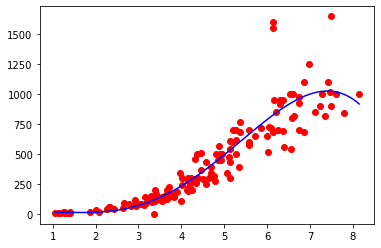

In [ ]:
x_grid_train = np.arange(min(x_train), max(x_train) + .01, step=0.01)
x_grid_test = np.arange(min(x_test), max(x_test) + .01, step=0.01)
x_grid_train = x_grid_train.reshape(len(x_grid_train), 1)
#x_grid_test = x_grid_train.reshape(len(x_grid_test), 1)
plt.scatter(x, y, color='red', label='Training Data Points')
plt.plot(x_grid_train, regressor.predict(poly_transform.transform(x_grid_train)), color='blue', label='Model Curve')

Then I did polynomial regression with feature of degree=20 (high variance/overfit) without scaling the dataset.

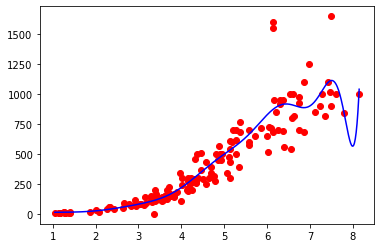

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_transform = PolynomialFeatures(degree=20, include_bias=False)
x_poly_train = poly_transform.fit_transform(x_train)
x_poly_test = poly_transform.transform(x_test)

regressor = LinearRegression()
regressor.fit(x_poly_train, y_train)
x_grid_train = np.arange(min(x_train), max(x_train) + .01, step=0.01)
x_grid_test = np.arange(min(x_test), max(x_test) + .01, step=0.01)
x_grid_train = x_grid_train.reshape(len(x_grid_train), 1)
#x_grid_test = x_grid_train.reshape(len(x_grid_test), 1)
plt.scatter(x, y, color='red', label='Training Data Points')
plt.plot(x_grid_train, regressor.predict(poly_transform.transform(x_grid_train)), color='blue', label='Model Curve')

In [ ]:
y_pred = regressor.predict(x_poly_train)
error3= mean_absolute_error(y_train, y_pred)
print('mean absolute error = '+str(error3))

mean absolute error = 79.53653450552434


In this part I'm going to scale my data first using Standardization scaling method.
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

I'm going to apply polynomial regression of degree 4 with scaled dataset.

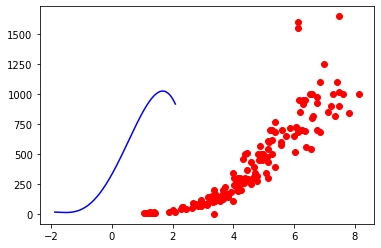

In [ ]:
poly_transform = PolynomialFeatures(degree=4, include_bias=False)
x_poly_train_scaled = poly_transform.fit_transform(x_train_scaled)
x_poly_test_scaled = poly_transform.transform(x_test_scaled)

regressor = LinearRegression()
regressor.fit(x_poly_train_scaled, y_train)
x_grid_train = np.arange(min(x_train_scaled), max(x_train_scaled) + .01, step=0.01)
x_grid_test = np.arange(min(x_test_scaled), max(x_test_scaled) + .01, step=0.01)
x_grid_train = x_grid_train.reshape(len(x_grid_train), 1)
#x_grid_test = x_grid_train.reshape(len(x_grid_test), 1)
plt.scatter(x, y, color='red', label='Training Data Points')
plt.plot(x_grid_train, regressor.predict(poly_transform.transform(x_grid_train)), color='blue', label='Model Curve')

In [ ]:
y_pred = regressor.predict(x_poly_train_scaled)
error4= mean_absolute_error(y_train, y_pred)
print('mean absolute error = '+str(error4))

mean absolute error = 81.82353747826286


I'm going to apply polynomial regression of degree 20 with scaled dataset.

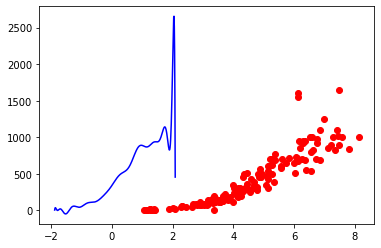

In [ ]:
poly_transform = PolynomialFeatures(degree=20, include_bias=False)
x_poly_train_scaled = poly_transform.fit_transform(x_train_scaled)
x_poly_test_scaled = poly_transform.transform(x_test_scaled)

regressor = LinearRegression()
regressor.fit(x_poly_train_scaled, y_train)
x_grid_train = np.arange(min(x_train_scaled), max(x_train_scaled) + .01, step=0.01)
x_grid_test = np.arange(min(x_test_scaled), max(x_test_scaled) + .01, step=0.01)
x_grid_train = x_grid_train.reshape(len(x_grid_train), 1)
#x_grid_test = x_grid_train.reshape(len(x_grid_test), 1)
plt.scatter(x, y, color='red', label='Training Data Points')
plt.plot(x_grid_train, regressor.predict(poly_transform.transform(x_grid_train)), color='blue', label='Model Curve')


In [ ]:
y_pred = regressor.predict(x_poly_train_scaled)
error5= mean_absolute_error(y_train, y_pred)
print('mean absolute error = '+str(error5))

mean absolute error = 81.01178170673887


In conclusion: 

The table below summarizes the Mean Absolute values of Linear Regression with high bias (underfit) without scaling, Poly Regression of degree 4, Poly Regression with high variance (overfit) and the unscaled version of them.  

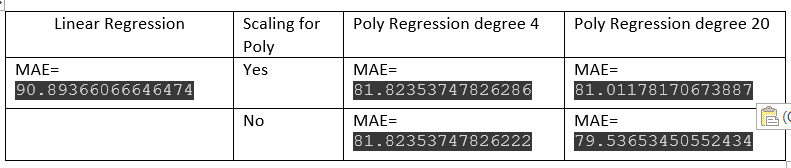

for the scaled version you can clearly tell that the MAE value of poly regression < linear regression.

We can notice that MAE value of poly regression degree 20 < poly regression degree 4. 
So, increasing the number of features decreases the MAE value.

for the unscaled version the MAE value of the poly regression < linear regression as well. 
MAE value of poly regression degree 4 > poly regression degree 20.
and we can notice that without scaling when we increase the number of features the MAE value decreases. 